In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('data/export_20feb_20_23pm_full_update.csv')
df_1.head()

,Unnamed: 0,SDATEHOUR,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,LATITUDE,...,UL_PKT_COUNT_ALL,UL_PKT_LOST_COUNT_ALL,UL_PAYLOAD_DATA_TOTAL_SIZE,UL_PAYLOAD_DATA_SIZE,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE
0,0,20200220 07,OTR0374L_C1,eUTRAN,OTR,B66,East,Toronto,-79.231896,43.780936,...,0,0,0,0,0,0,0,0,2,12650
1,1,20200220 07,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,43.663444,...,0,0,0,0,0,0,0,0,1,12650
2,2,20200220 07,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,43.663444,...,725,5,55751,51417,606,0,46547,39593,1,12650
3,3,20200220 07,OTR0511L_B1,eUTRAN,OTR,B66,East,Toronto,-79.723706,43.664807,...,0,0,0,0,0,0,0,0,1,12200
4,4,20200220 07,OOT0063L_A1,eUTRAN,OOT,B4,East,Ottawa,-75.803776,45.332680,...,0,0,0,0,0,0,0,0,1,23850


In [3]:
#df_1 = df_1.drop(['CI'], axis=1)
#df_1.head()
#df_1.to_csv(r'data/export_20feb_20_23pm_full_update.csv')

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894852 entries, 0 to 1894851
Data columns (total 51 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   SDATEHOUR                   object 
 2   SITE_NAME                   object 
 3   NETWORK_TYPE                object 
 4   AREA                        object 
 5   AREA_TYPE                   object 
 6   AREA2                       object 
 7   AREA3                       object 
 8   LONGITUDE                   float64
 9   LATITUDE                    float64
 10  IPADD_DOTNUMFORMAT(SGW_IP)  object 
 11  TS_START                    object 
 12  TS_END                      object 
 13  UL_PKT_COUNT                int64  
 14  UL_PKT_LOST_COUNT           int64  
 15  UL_PKT_COUNT_1              int64  
 16  UL_PKT_LOST_COUNT_1         int64  
 17  UL_PKT_LATENCY              int64  
 18  UL_PKT_JITTER               int64  
 19  UL_MOS               

In [5]:
df_1[["TS_START","SITE_NAME" , "TRAFFIC_UL", "TRAFFIC_DL"]]

,TS_START,SITE_NAME,TRAFFIC_UL,TRAFFIC_DL
0,20-02-20 07:56:10.452545000 PM,OTR0374L_C1,155139,86553
1,20-02-20 07:59:56.335779000 PM,OTR0646L_C1,6187,6164
2,20-02-20 07:59:29.046554000 PM,OTR0646L_C1,30701,22653
3,20-02-20 07:59:33.066874000 PM,OTR0511L_B1,59884,10444
4,20-02-20 07:59:14.230817000 PM,OOT0063L_A1,37005,110356
...,...,...,...,...
1894847,20-02-20 11:52:36.208924000 PM,BVA0196L_C1,34191,48000
1894848,20-02-20 11:55:29.180810000 PM,BVA0159L_B3,43792,60408
1894849,20-02-20 11:55:16.452934000 PM,BVA0159L_B3,43792,60408
1894850,20-02-20 11:53:37.247889000 PM,AED0021L_C1,12067,12550


In [6]:
df_1.insert(2, "Bandwidth", "1000000") 

In [7]:
df_1.head()

,Unnamed: 0,SDATEHOUR,Bandwidth,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,...,UL_PKT_COUNT_ALL,UL_PKT_LOST_COUNT_ALL,UL_PAYLOAD_DATA_TOTAL_SIZE,UL_PAYLOAD_DATA_SIZE,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE
0,0,20200220 07,1000000,OTR0374L_C1,eUTRAN,OTR,B66,East,Toronto,-79.231896,...,0,0,0,0,0,0,0,0,2,12650
1,1,20200220 07,1000000,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,...,0,0,0,0,0,0,0,0,1,12650
2,2,20200220 07,1000000,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,...,725,5,55751,51417,606,0,46547,39593,1,12650
3,3,20200220 07,1000000,OTR0511L_B1,eUTRAN,OTR,B66,East,Toronto,-79.723706,...,0,0,0,0,0,0,0,0,1,12200
4,4,20200220 07,1000000,OOT0063L_A1,eUTRAN,OOT,B4,East,Ottawa,-75.803776,...,0,0,0,0,0,0,0,0,1,23850


In [8]:
df_1['TotalTraffic'] = df_1['TRAFFIC_UL'] + df_1['TRAFFIC_DL']
#df['C'] = df.apply(lambda row: row['A'] + row['B'], axis=1)

In [9]:
df_1[["TS_START","SITE_NAME" , "TRAFFIC_UL", "TRAFFIC_DL", "Bandwidth", "TotalTraffic"]]

,TS_START,SITE_NAME,TRAFFIC_UL,TRAFFIC_DL,Bandwidth,TotalTraffic
0,20-02-20 07:56:10.452545000 PM,OTR0374L_C1,155139,86553,1000000,241692
1,20-02-20 07:59:56.335779000 PM,OTR0646L_C1,6187,6164,1000000,12351
2,20-02-20 07:59:29.046554000 PM,OTR0646L_C1,30701,22653,1000000,53354
3,20-02-20 07:59:33.066874000 PM,OTR0511L_B1,59884,10444,1000000,70328
4,20-02-20 07:59:14.230817000 PM,OOT0063L_A1,37005,110356,1000000,147361
...,...,...,...,...,...,...
1894847,20-02-20 11:52:36.208924000 PM,BVA0196L_C1,34191,48000,1000000,82191
1894848,20-02-20 11:55:29.180810000 PM,BVA0159L_B3,43792,60408,1000000,104200
1894849,20-02-20 11:55:16.452934000 PM,BVA0159L_B3,43792,60408,1000000,104200
1894850,20-02-20 11:53:37.247889000 PM,AED0021L_C1,12067,12550,1000000,24617


In [10]:
df_1.describe()

,Unnamed: 0,LONGITUDE,LATITUDE,UL_PKT_COUNT,UL_PKT_LOST_COUNT,UL_PKT_COUNT_1,UL_PKT_LOST_COUNT_1,UL_PKT_LATENCY,UL_PKT_JITTER,UL_MOS,...,UL_PKT_LOST_COUNT_ALL,UL_PAYLOAD_DATA_TOTAL_SIZE,UL_PAYLOAD_DATA_SIZE,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE,TotalTraffic
count,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.888635e+06,...,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06,1.894852e+06
mean,9.474255e+05,-9.515774e+01,4.650219e+01,3.920512e+03,3.572549e+00,3.920512e+03,3.572549e+00,4.822593e+05,1.067534e+06,3.417968e+03,...,1.888649e+00,1.437207e+05,1.395827e+05,2.094879e+03,9.733636e-01,1.513512e+05,1.462469e+05,1.350941e+00,1.295876e+04,3.381649e+05
std,5.469968e+05,1.933637e+01,3.592197e+00,1.198113e+04,3.678152e+01,1.198113e+04,3.678152e+01,8.734951e+05,5.472808e+07,1.421612e+03,...,5.520070e+01,6.713890e+05,6.697095e+05,9.868245e+03,5.494738e+01,7.095622e+05,7.076983e+05,4.772648e-01,2.856024e+03,1.021589e+06
min,0.000000e+00,-1.303310e+02,4.209837e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.880000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01
25%,4.737128e+05,-1.140653e+02,4.367957e+01,1.840000e+02,0.000000e+00,1.840000e+02,0.000000e+00,1.774200e+04,3.644000e+03,2.051000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.220000e+04,1.606600e+04
50%,9.474255e+05,-7.978005e+01,4.381326e+01,7.170000e+02,0.000000e+00,7.170000e+02,0.000000e+00,6.027800e+04,1.123500e+04,4.374000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.220000e+04,6.265950e+04
75%,1.421138e+06,-7.942959e+01,4.926715e+01,2.465000e+03,0.000000e+00,2.465000e+03,0.000000e+00,6.155090e+05,1.392900e+04,4.403000e+03,...,0.000000e+00,3.825700e+04,2.303200e+04,5.950000e+02,0.000000e+00,4.764825e+04,2.505425e+04,2.000000e+00,1.265000e+04,2.137072e+05
max,1.894851e+06,-7.469753e+01,5.431100e+01,3.599550e+05,9.271000e+03,3.599550e+05,9.271000e+03,2.650812e+08,4.293791e+09,4.500000e+03,...,6.553500e+04,2.989769e+07,2.988414e+07,3.529420e+05,6.553500e+04,3.204204e+07,3.201784e+07,2.000000e+00,2.385000e+04,4.300613e+07


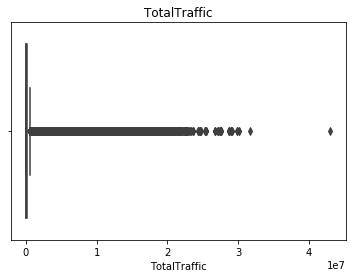

In [11]:
# boxplot
sns.boxplot(df_1['TotalTraffic'])
plt.title('TotalTraffic')

plt.show()

In [12]:
df_1.shape

(1894852, 53)

In [13]:
df_1[df_1['TotalTraffic'] == 584]

,Unnamed: 0,SDATEHOUR,Bandwidth,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,...,UL_PKT_LOST_COUNT_ALL,UL_PAYLOAD_DATA_TOTAL_SIZE,UL_PAYLOAD_DATA_SIZE,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE,TotalTraffic
331222,331222,20200220 08,1000000,ACA0090L_B1,eUTRAN,ACA,B66,West,Calgary,-113.984935,...,0,0,0,0,0,0,0,1,23850,584
860216,860216,20200220 09,1000000,OTR0301L_B1,eUTRAN,OTR,B66,East,Toronto,-79.413192,...,0,0,0,0,0,0,0,1,23850,584
1066078,1066078,20200220 09,1000000,AED0002L_B1,eUTRAN,AED,B66,West,Edmonton,-113.522866,...,0,0,0,0,0,0,0,1,23850,584
1066858,1066858,20200220 09,1000000,AED0025L_C3,eUTRAN,AED,B13,West,Edmonton,-113.428280,...,0,0,0,0,0,0,0,1,23850,584
1350594,1350594,20200220 10,1000000,OTR0697L_D4,eUTRAN,OTR,B7,East,Toronto,-79.285541,...,0,0,0,0,0,0,0,1,23850,584
1443507,1443507,20200220 10,1000000,BVAa002-950000_11,eUTRAN,BVA,B66,West,Vancouver,-123.101635,...,0,0,0,0,0,0,0,2,23850,584


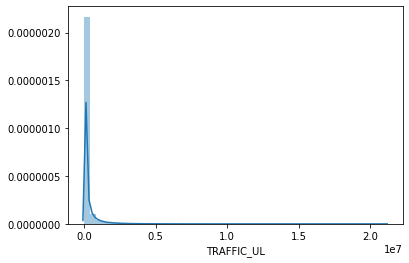

In [16]:
sns.distplot(df_1['TRAFFIC_UL'])
plt.show()

In [ ]:
sns.jointplot('TotalTraffic', 'DL_PKT_JITTER_RTCP', df_1)
plt.show()

In [18]:
df_1['TS_START'] = pd.to_datetime(df_1['TS_START'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894852 entries, 0 to 1894851
Data columns (total 53 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Unnamed: 0                  int64         
 1   SDATEHOUR                   object        
 2   Bandwidth                   object        
 3   SITE_NAME                   object        
 4   NETWORK_TYPE                object        
 5   AREA                        object        
 6   AREA_TYPE                   object        
 7   AREA2                       object        
 8   AREA3                       object        
 9   LONGITUDE                   float64       
 10  LATITUDE                    float64       
 11  IPADD_DOTNUMFORMAT(SGW_IP)  object        
 12  TS_START                    datetime64[ns]
 13  TS_END                      object        
 14  UL_PKT_COUNT                int64         
 15  UL_PKT_LOST_COUNT           int64         
 16  UL_PKT_COUNT_1    

In [19]:
time_df = df_1.groupby('TS_START')['TotalTraffic'].sum()
print(time_df.head())

TS_START
2020-02-20 18:04:25.147724    19626546
2020-02-20 18:04:34.693995    19626546
2020-02-20 18:05:12.594119    15722555
2020-02-20 18:05:21.078184    15722555
2020-02-20 18:06:56.801955     8179616
Name: TotalTraffic, dtype: int64


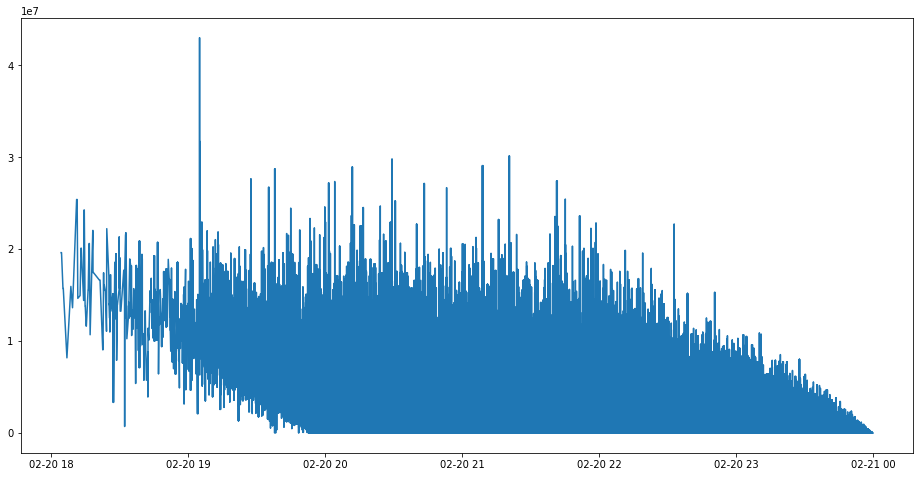

In [21]:
plt.figure(figsize=(16, 8))

# tsplot
sns.lineplot(data=time_df)
plt.show()

In [24]:
# extracting month and year from date

# extract month
df_1['date'] = df_1['TS_START'].dt.date

# extract year
df_1['hour'] = df_1['TS_START'].dt.hour

# extract year
df_1['minute'] = df_1['TS_START'].dt.minute

df_1.head()

,Unnamed: 0,SDATEHOUR,Bandwidth,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,...,DL_PKT_COUNT_ALL,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE,TotalTraffic,date,hour,minute
0,0,20200220 07,1000000,OTR0374L_C1,eUTRAN,OTR,B66,East,Toronto,-79.231896,...,0,0,0,0,2,12650,241692,2020-02-20,19,56
1,1,20200220 07,1000000,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,...,0,0,0,0,1,12650,12351,2020-02-20,19,59
2,2,20200220 07,1000000,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,...,606,0,46547,39593,1,12650,53354,2020-02-20,19,59
3,3,20200220 07,1000000,OTR0511L_B1,eUTRAN,OTR,B66,East,Toronto,-79.723706,...,0,0,0,0,1,12200,70328,2020-02-20,19,59
4,4,20200220 07,1000000,OOT0063L_A1,eUTRAN,OOT,B4,East,Ottawa,-75.803776,...,0,0,0,0,1,23850,147361,2020-02-20,19,59


In [26]:
df_time = df_1.groupby(["SITE_NAME", "hour"]).TotalTraffic.mean()
df_time.head()

SITE_NAME    hour
ACA0001L_A1  20      197980.404762
             21      192221.592593
             22      131127.718750
             23      229650.137931
ACA0001L_A2  19      289598.000000
Name: TotalTraffic, dtype: float64

In [34]:
# Pivoting the data using 'month' 
hour_min = pd.pivot_table(df_1, values='TotalTraffic', index='SITE_NAME', columns='hour', aggfunc='mean')
hour_min.head()

hour,18,19,20,21,22,23
SITE_NAME,,,,,,
ACA0001L_A1,NaN,NaN,197980.404762,192221.592593,131127.718750,229650.137931
ACA0001L_A2,NaN,289598.0,116405.642857,29287.000000,107263.600000,256038.000000
ACA0001L_A3,NaN,388901.0,261924.321429,350301.518519,217306.153846,756577.363636
ACA0001L_B1,NaN,NaN,181474.270833,508311.392857,72929.066667,338339.500000
ACA0001L_B2,NaN,NaN,65548.750000,242711.000000,47366.250000,56002.000000


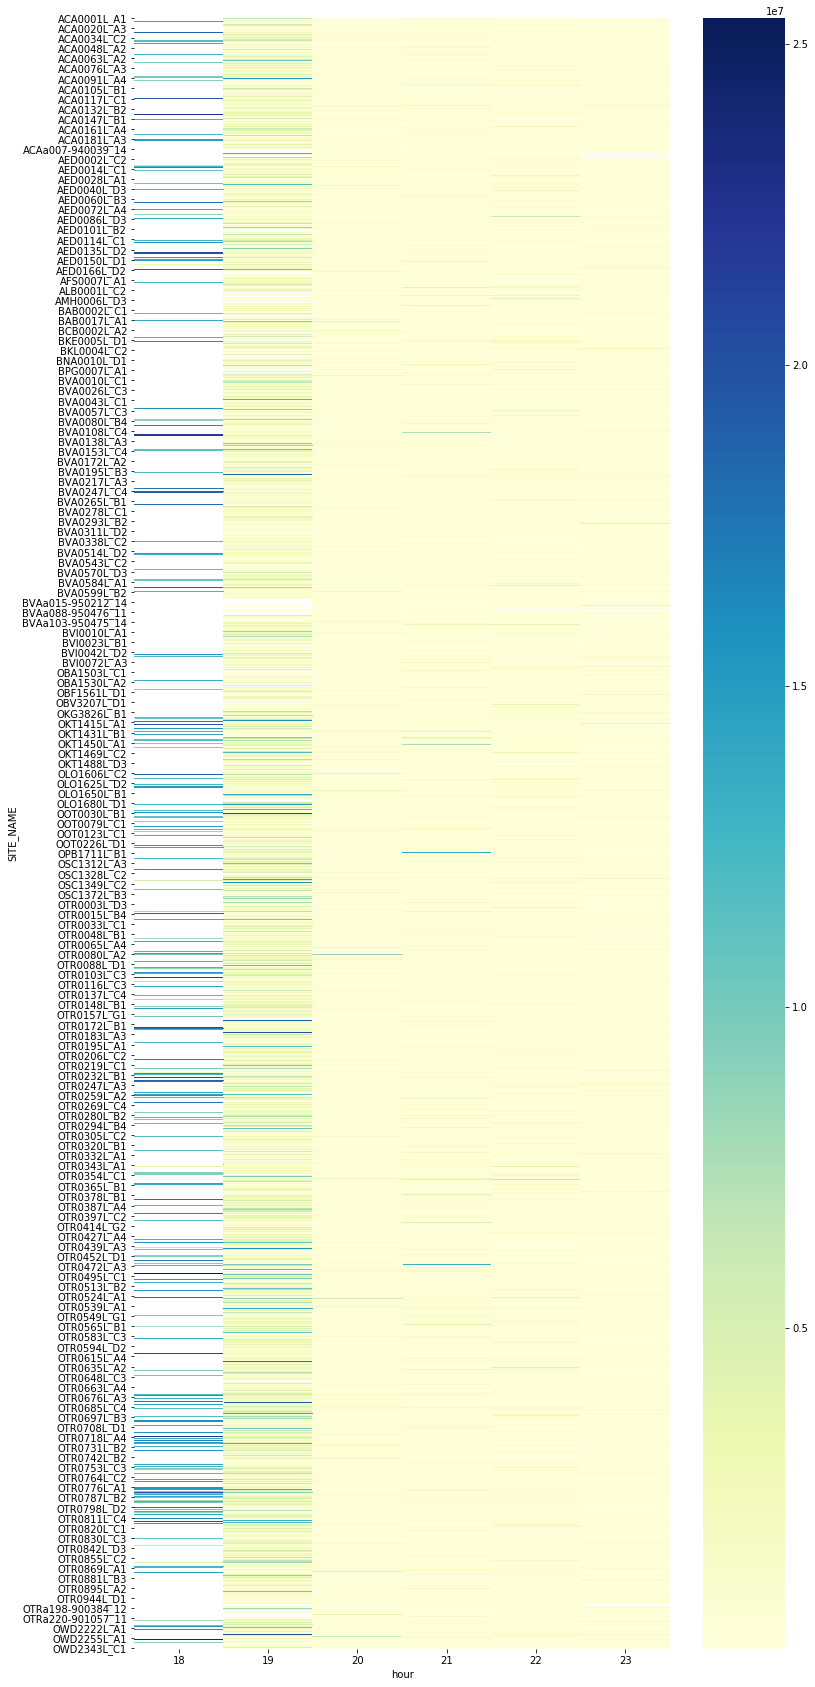

In [38]:
plt.figure(figsize=(12,30))

# heatmap with a color map of choice
sns.heatmap(hour_min, cmap="YlGnBu")
plt.show()

In [41]:
df_1.min
df_1.minute
df_1.hour

0          56
1          59
2          59
3          59
4          59
           ..
1894847    52
1894848    55
1894849    55
1894850    53
1894851    29
Name: minute, Length: 1894852, dtype: int64

In [45]:

df_1['hour_min'] = df_1['hour'].map(str) + '_' + df_1['minute'].map(str)

In [46]:
df_1.head()

,Unnamed: 0,SDATEHOUR,Bandwidth,SITE_NAME,NETWORK_TYPE,AREA,AREA_TYPE,AREA2,AREA3,LONGITUDE,...,DL_PKT_LOST_COUNT_ALL,DL_PAYLOAD_DATA_TOTAL_SIZE,DL_PAYLOAD_DATA_SIZE,DIR,CODEC_RATE,TotalTraffic,date,hour,minute,hour_min
0,0,20200220 07,1000000,OTR0374L_C1,eUTRAN,OTR,B66,East,Toronto,-79.231896,...,0,0,0,2,12650,241692,2020-02-20,19,56,19_56
1,1,20200220 07,1000000,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,...,0,0,0,1,12650,12351,2020-02-20,19,59,19_59
2,2,20200220 07,1000000,OTR0646L_C1,eUTRAN,OTR,B66,East,Toronto,-79.752588,...,0,46547,39593,1,12650,53354,2020-02-20,19,59,19_59
3,3,20200220 07,1000000,OTR0511L_B1,eUTRAN,OTR,B66,East,Toronto,-79.723706,...,0,0,0,1,12200,70328,2020-02-20,19,59,19_59
4,4,20200220 07,1000000,OOT0063L_A1,eUTRAN,OOT,B4,East,Ottawa,-75.803776,...,0,0,0,1,23850,147361,2020-02-20,19,59,19_59


In [47]:
mean_hour_min = pd.pivot_table(df_1, values='TotalTraffic', index='SITE_NAME', columns='hour_min', aggfunc='mean')
mean_hour_min.head()

hour_min,18_11,18_12,18_13,18_14,18_15,18_16,18_17,18_18,18_21,18_22,...,23_54,23_55,23_56,23_57,23_58,23_59,23_6,23_7,23_8,23_9
SITE_NAME,,,,,,,,,,,,,,,,,,,,,
ACA0001L_A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,214751.0,NaN,NaN,NaN,NaN,NaN,NaN
ACA0001L_A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACA0001L_A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61288.0,7082809.0,6980018.0,NaN
ACA0001L_B1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2183.0,220557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACA0001L_B2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
sns.lineplot(mean_hour_min, )

time_df = df_1.groupby('TS_START')['TotalTraffic'].sum()

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

In [ ]:
# Pivoting the data using 'month' 
hour_min = pd.pivot_table(df_1, values='TotalTraffic', index='SITE_NAME', columns='hour', aggfunc='mean')


hour_min.head()



In [49]:
def univariate(df,col,vartype,loan,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    loan    : Dataframe name 
    vartype : variable type : continuous or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Can be used for categorical analysis.
    
    '''
    sns.set(style="whitegrid")
    #Using subplots to plot 3 graphs in single row
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [54]:
hour_min.head()

hour,18,19,20,21,22,23
SITE_NAME,,,,,,
ACA0001L_A1,NaN,NaN,197980.404762,192221.592593,131127.718750,229650.137931
ACA0001L_A2,NaN,289598.0,116405.642857,29287.000000,107263.600000,256038.000000
ACA0001L_A3,NaN,388901.0,261924.321429,350301.518519,217306.153846,756577.363636
ACA0001L_B1,NaN,NaN,181474.270833,508311.392857,72929.066667,338339.500000
ACA0001L_B2,NaN,NaN,65548.750000,242711.000000,47366.250000,56002.000000


KeyError: 'hour'

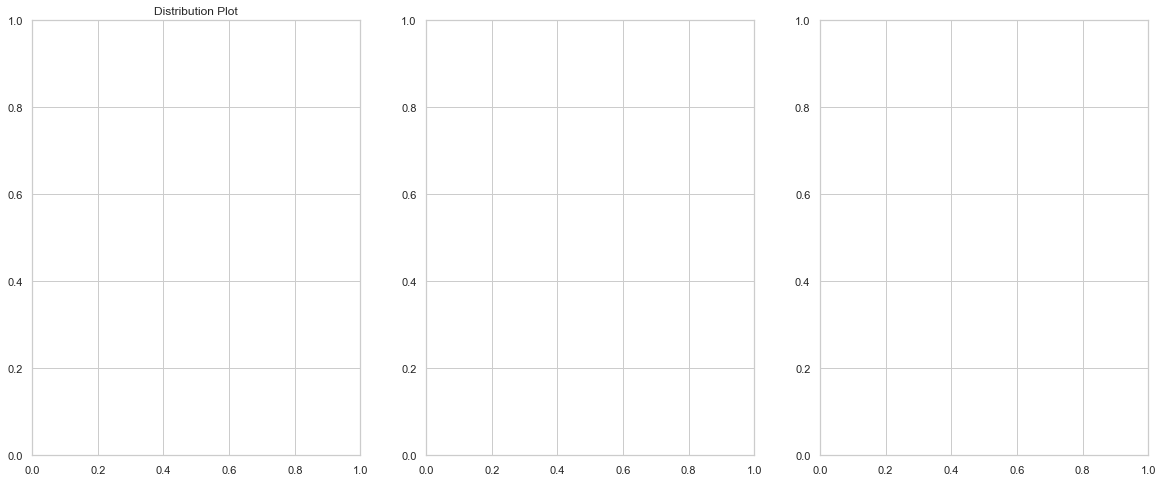

In [55]:
univariate(df=hour_min,col='hour',loan='TotalTraffic',vartype=0)
#univariate(df=hour_min,col='loan_amnt_range',vartype=1,loan=loan_curr3,hue='TARGET')

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import os

In [11]:
#making point shapefile
binpath_b = '/Users/ihasan/Downloads/Blogging/Mapping in python with geopandas/'
fn_b = os.path.join(binpath_b,'point_inf.csv')
df = pd.read_csv(fn_b)
df['Coordinates'] = list(zip(df.Long, df.Lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
sites = gpd.GeoDataFrame(df, geometry='Coordinates')
sites.plot() #This will plots the points

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'